# Mathematical Tools
Chapter 9 of Python for Finance. 

Hilpisch, Yves. Python for Finance: Analyze Big Financial Data (Kindle Locations 8343-8347). O'Reilly Media. Kindle Edition. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5*x

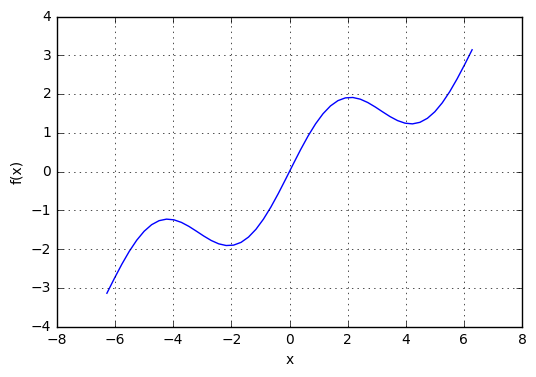

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi,50)
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

## Regression
Starting with a linear regression

In [4]:
reg = np.polyfit(x,f(x), deg=1)
ry = np.polyval(reg,x)

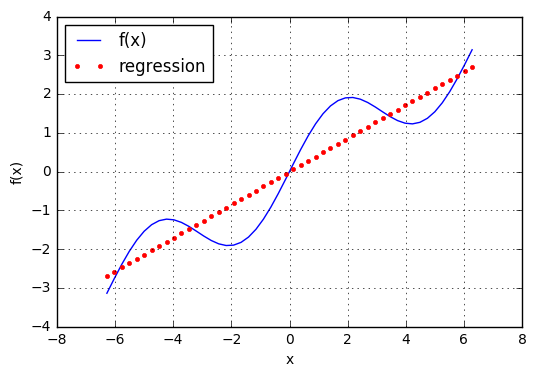

In [5]:
plt.plot(x, f( x), 'b', label ='f(x)') 
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc = 0) 
plt.grid(True) 
plt.xlabel('x') 
plt.ylabel('f(x)')

Since this doesn't capture the sin shape, we try again with a higher order polynomial.

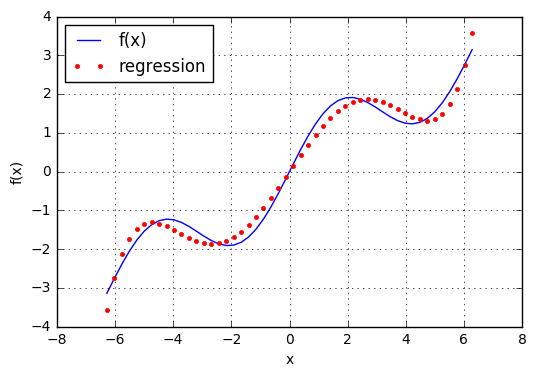

In [6]:
reg = np.polyfit(x,f(x), deg=5)
ry = np.polyval(reg,x)

plt.plot(x, f( x), 'b', label ='f(x)') 
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc = 0) 
plt.grid(True) 
plt.xlabel('x') 
plt.ylabel('f(x)')

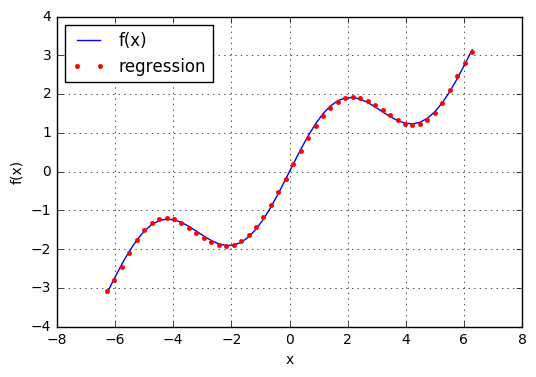

In [7]:
reg = np.polyfit(x,f(x), deg=7)
ry = np.polyval(reg,x)

plt.plot(x, f( x), 'b', label ='f(x)') 
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc = 0) 
plt.grid(True) 
plt.xlabel('x') 
plt.ylabel('f(x)')

In [8]:
np.allclose(f(x),ry)

False

Checking the mean squared error:

In [9]:
np.sum((f(x)-ry)**2)/len(x)

0.0017769134759517593

## Individual basis functions

In [10]:
matrix = np.zeros((3+1, len(x)))
matrix[3, :] = x**3
matrix[2, :] = x**2
matrix[1, :] = x
matrix[0, :] = 1

In [11]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [12]:
reg

array([  1.50654604e-14,   5.62777448e-01,  -1.11022302e-15,
        -5.43553615e-03])

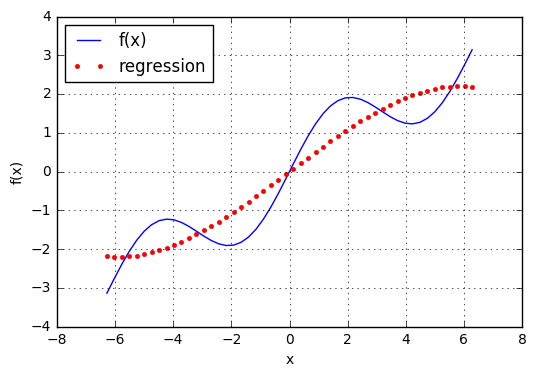

In [13]:
ry = np.dot(reg, matrix)

plt.plot(x, f(x), 'b', label ='f(x)') 
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc = 0) 
plt.grid(True) 
plt.xlabel('x') 
plt.ylabel('f(x)')

Replacing the highest order of the monomial with a sine function.

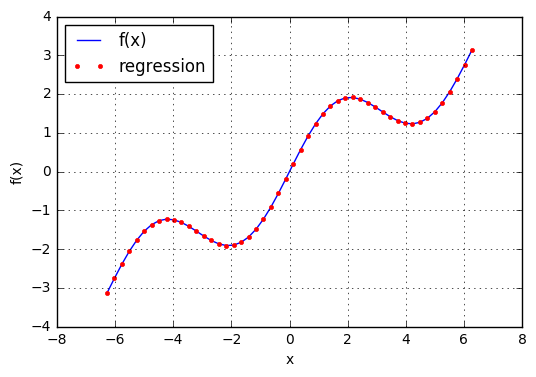

In [14]:
matrix[3,:] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

plt.plot(x, f(x), 'b', label ='f(x)') 
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc = 0) 
plt.grid(True) 
plt.xlabel('x') 
plt.ylabel('f(x)')

In [15]:
np.allclose(f(x), ry)

True

In [16]:
np.sum((f(x)-ry)**2) / len(x)

3.3455714249939549e-31

In [17]:
reg

array([  4.20040680e-16,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

### Dealing with noisy data

In [18]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50) 
xn = xn + 0.15 * np.random.standard_normal(len(xn)) 
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

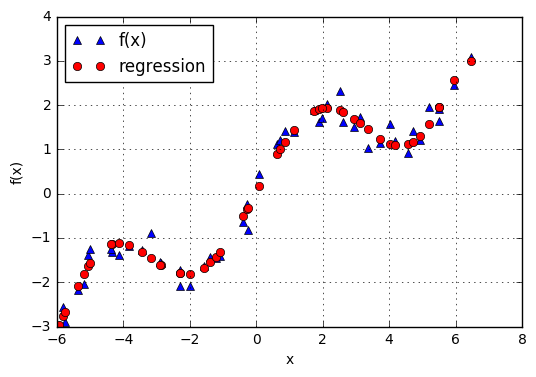

In [19]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg,xn)

plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression') 
plt.legend(loc = 0) 
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

### Multiple dimensions

In [20]:
def fm(x,y):
    return np.sin(x) + 0.25*x + np.sqrt(y) + 0.05*y**2

In [21]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X,Y = np.meshgrid(x,y) # generates 2d grids out of 1-d arrays
Z = fm(X,Y)
x = X.flatten()  # yields 1-d arrays out of 2-d grids
y = Y.flatten()

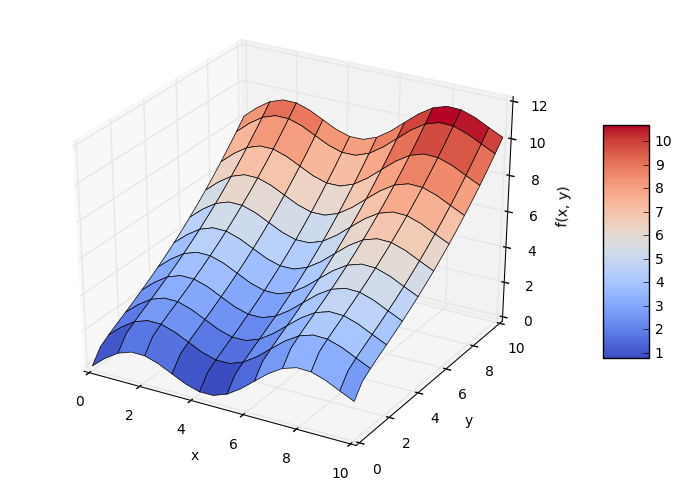

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mpl 

fig = plt.figure(figsize = (9, 6)) 
ax = fig.gca(projection ='3d') 
surf = ax.plot_surface(X, Y, Z, 
                       rstride = 2, 
                       cstride = 2, 
                       cmap = mpl.cm.coolwarm, 
                       linewidth = 0.5, 
                       antialiased = True) 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.set_zlabel('f(x, y)') 
fig.colorbar(surf, shrink = 0.5, aspect = 5)

In [23]:
matrix = np.zeros((len(x), 6 + 1)) 
matrix[:, 6] = np.sqrt(y) 
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2 
matrix[:, 3] = x ** 2 
matrix[:, 2] = y 
matrix[:, 1] = x 
matrix[:, 0] = 1

Least Squares Regression using ```statsmodels```

In [24]:
import statsmodels.api as sm

In [25]:
model = sm.OLS(fm(x,y), matrix).fit()

In [26]:
model.rsquared

1.0

In [27]:
a = model.params
a

array([  3.05311332e-16,   2.50000000e-01,   7.21644966e-16,
        -3.43475248e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

In [28]:
def reg_func(a, x, y): 
    f6 = a[6] * np.sqrt(y) 
    f5 = a[5] * np.sin(x) 
    f4 = a[4] * y ** 2 
    f3 = a[3] * x ** 2 
    f2 = a[2] * y 
    f1 = a[1] * x 
    f0 = a[0] * 1 
    
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)

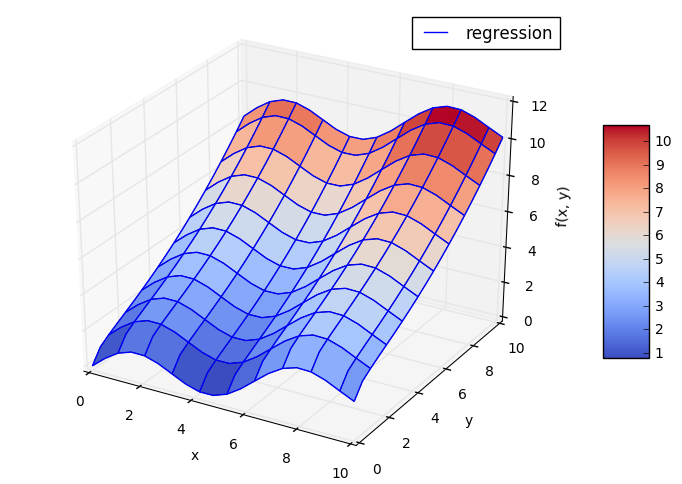

In [29]:
RZ = reg_func(a, X, Y)
fig = plt.figure(figsize = (9, 6)) 
ax = fig.gca(projection ='3d') 
surf1 = ax.plot_surface(X, Y, Z, 
                        rstride = 2, 
                        cstride = 2, 
                        cmap = mpl.cm.coolwarm, 
                        linewidth = 0.5, 
                        antialiased = True) 
surf2 = ax.plot_wireframe(X, Y, RZ,
                          rstride = 2, 
                          cstride = 2, 
                          label ='regression') 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.set_zlabel('f(x, y)') 
ax.legend() 
fig.colorbar(surf, shrink = 0.5, aspect = 5)

## Interpolation

In [30]:
import scipy.interpolate as spi
x = np.linspace(-2 * np.pi, 2 * np.pi,25)

In [31]:
def f(x):
    return np.sin(x) + 0.5 * x

Using linear interpolation:

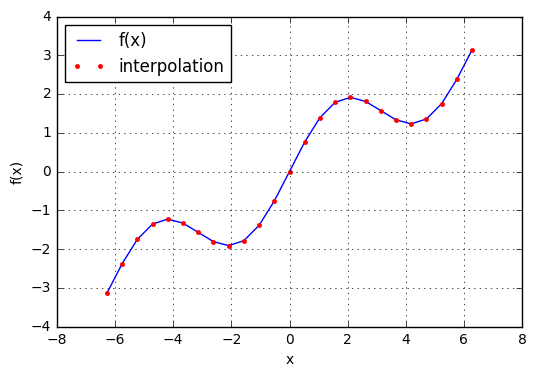

In [32]:
ipo = spi.splrep(x, f(x), k=1)
iy = spi.splev(x, ipo)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [33]:
np.allclose(f(x), iy)

True

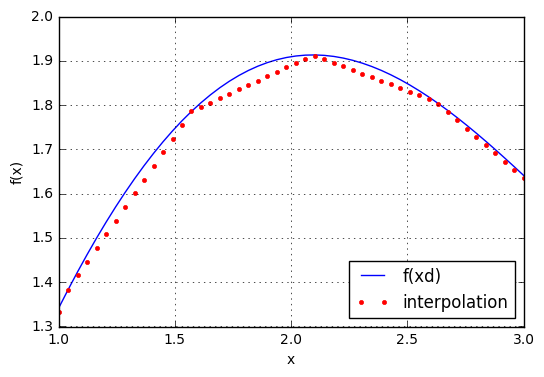

In [34]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label = 'f(xd)')
plt.plot(xd, iyd, 'r.', label = 'interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Using cubic splines:

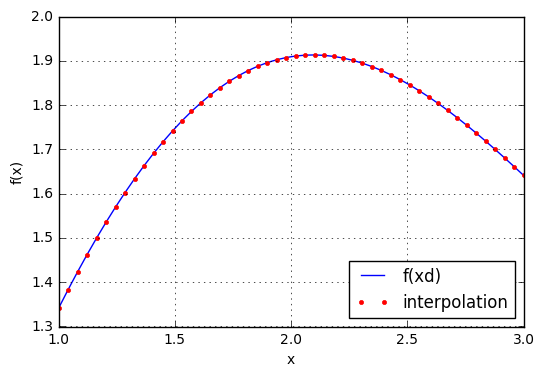

In [35]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label = 'f(xd)')
plt.plot(xd, iyd, 'r.', label = 'interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [36]:
np.allclose(f(xd), iyd)

False

In [37]:
np.sum((f(xd)-iyd)**2)/len(xd)

1.1349319851436252e-08

## Convex Optimization

In [38]:
def fm(z):
    x,y = z
    return (np.sin(x) + 0.05 * x **2 + np.sin(y) + 0.05 * y ** 2)

In [39]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X,Y = np.meshgrid(x,y)
Z = fm((X,Y))

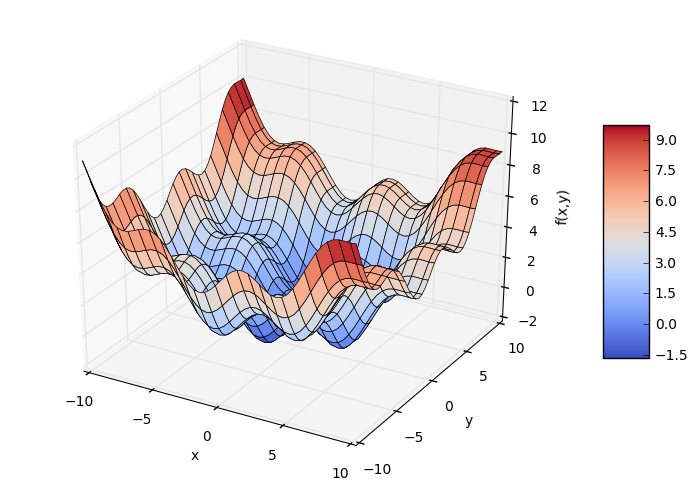

In [40]:
fig = plt.figure(figsize =( 9, 6)) 
ax = fig.gca(projection ='3d') 
surf = ax.plot_surface(X, Y, Z, 
                       rstride = 2, 
                       cstride = 2, 
                       cmap = mpl.cm.coolwarm, 
                       linewidth = 0.5, 
                       antialiased = True) 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.set_zlabel('f(x,y)') 
fig.colorbar(surf, shrink = 0.5, aspect = 5)

Looking for both local and global minimums.

In [41]:
import scipy.optimize as spo

Global optimization

In [42]:
def fo(z):
    x,y = z
    z = (np.sin(x) + 0.05 * x **2 + np.sin(y) + 0.05 * y ** 2)
    if output == True:
        print('{:8.4f} {:8.4f} {:8.4f}'.format(x,y,z))
    return z

In [43]:
output=True
fo((10,10))

 10.0000  10.0000   8.9120


8.9119577782212609

In [44]:
output = True
opt1 = spo.brute(fo,(slice(-10,15,5),slice(-10,15,5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


In [45]:
output=False
opt1 = spo.brute(fo,(slice(-10,10.1,0.1),slice(-10,10.1,0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [46]:
fm(opt1)

-1.7748994599769203

### Local optimization

In [47]:
output = True
opt2 = spo.fmin(fo,opt1,xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [48]:
fm(opt2)

-1.7757246992239009

In [49]:
output = False
spo.fmin(fo,(2.0,2.0),maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

### Constrained Optimization

In [50]:
from math import sqrt

#Objective Function
def Eu(z):
    a,b = z
    return -(0.5*sqrt(15*a + 5*b) + 0.5*sqrt(5*a + 12*b))

#Constraints
cons = ({'type':'ineq', 'fun': lambda z: 100 - 10*z[0] - 10*z[1]})

#Budget constraint:
bnds = ((0,1000),(0,1000)) #upper bounds large enough

In [51]:
result = spo.minimize(Eu, [5,5], method='SLSQP', bounds=bnds, constraints=cons)

In [52]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

In [53]:
result['x']

array([ 8.02547122,  1.97452878])

In [54]:
-result['fun']

9.700883611487832

In [55]:
np.dot(result['x'],[10,10])

99.999999999999986

### Integration

$$\int_{0.5}^{9.5}(\sin(x) + \frac{1}{2}x)dx $$

In [56]:
import scipy.integrate as sci

In [57]:
def f(x):
    return np.sin(x) + 0.5*x

In [58]:
a = 0.5
b = 9.5
x = np.linspace(0,10)
y = f(x)

In [59]:
from matplotlib.patches import Polygon

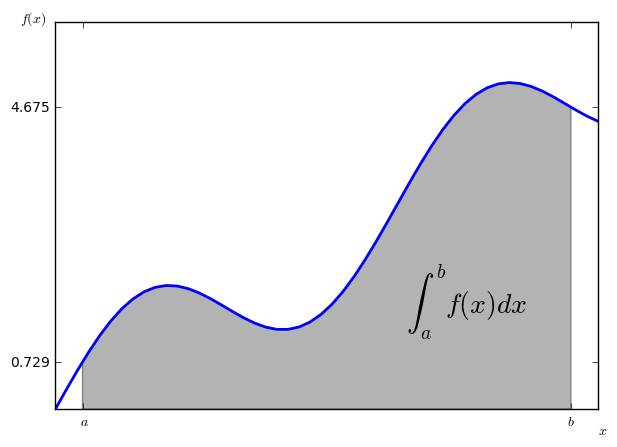

In [60]:
fix, ax = plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',linewidth=2)
plt.ylim(ymin=0)

# area under the function 
# between lower and upper limit 
Ix = np.linspace(a, b) 
Iy = f(Ix) 
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)] 
poly = Polygon(verts, facecolor =' 0.7', edgecolor =' 0.5') 
ax.add_patch(poly) 

# labels 
plt.text(0.75 * (a + b), 1.5, r" $\int_a ^ b f( x) dx $", horizontalalignment ='center', fontsize = 20) 
plt.figtext(0.9, 0.075, '$ x $') 
plt.figtext(0.075, 0.9, '$ f(x) $') 
ax.set_xticks((a, b)) 
ax.set_xticklabels((' $ a $', '$ b $')) 
ax.set_yticks([f(a), f(b)])



### Numerical Integration
There are different methods in the *integrate* sublibrary
* fixed Gaussian quadrature
* adaptive quadrature
* Romberg integration

In [61]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [62]:
sci.quad(f, a, b)[0]

24.374754718086752

In [63]:
sci.romberg(f, a, b)

24.374754718086713

In [64]:
xi = np.linspace(a, b, 25)
sci.trapz(f(xi),xi)

24.352733271544516

In [65]:
sci.simps(f(xi),xi)

24.374964184550748

### Integration by simulation

In [66]:
for i in range(1, 20): 
    np.random.seed(1000) 
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x)) / len(x) * (b - a))

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985


### Symbolic Computation

In [67]:
import sympy as sy

In [68]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [69]:
type(x)

sympy.core.symbol.Symbol

In [70]:
sy.sqrt(x)

sqrt(x)

In [71]:
3 + sy.sqrt(x) - 4**2

sqrt(x) - 13

In [72]:
f = x**2+3+0.5*x**2 + 3/2
sy.simplify(f)

1.5*x**2 + 4.5

In [73]:
sy.init_printing(pretty_print=False, use_unicode=False, use_latex=False)
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [74]:
sy.solve(x**2-1)

[-1, 1]

In [75]:
sy.solve(x**3 + 0.5*x**2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [76]:
sy.solve(x**2+y**2)

[{x: -I*y}, {x: I*y}]

### Symbolic integration

In [77]:
a,b = sy.symbols('a b')

In [78]:
print(sy.pretty(sy.Integral( sy.sin( x) + 0.5 * x, (x, a, b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [79]:
int_func = sy.integrate(sy.sin(x) + 0.5*x, x)
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [80]:
Fb = int_func.subs(x,9.5).evalf()
Fa = int_func.subs(x,0.5).evalf()
Fb-Fa #exact value of the integral

24.3747547180867

In [81]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5*x, (x, a, b))
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [82]:
int_func_limits.subs({a:0.5, b:9.5}).evalf()

24.3747547180868

In [83]:
sy.integrate(sy.sin(x) + 0.5*x, (x, 0.5, 9.5))

24.3747547180867

### Differentiation

In [84]:
int_func.diff()

0.5*x + sin(x)

In [85]:
f = (sy.sin(x) + 0.05*x**2 + sy.sin(y) + 0.05*y**2)

In [86]:
del_x = sy.diff(f,x)
del_x

0.1*x + cos(x)

In [87]:
del_y=sy.diff(f,y)
del_y

0.1*y + cos(y)

In [88]:
xo = sy.nsolve(del_x,-1.5)
xo

mpf('-1.4275517787645941')

In [89]:
yo = sy.nsolve(del_y,-1.5)
yo

mpf('-1.4275517787645941')

In [90]:
f.subs({x:xo,y:yo}).evalf()

-1.77572565314742

In [91]:
xo = sy.nsolve(del_x,1.5)
yo = sy.nsolve(del_y,1.5)
f.subs({x:xo,y:yo}).evalf()

2.27423381055640